## Natural Language Processing

Date: 15/05/2024

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include all the libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy
* itertools
* nltk

## Introduction
In this task I am going to load the job ads decriptions and pre process the data. The data is loaded using the load_files method. In order to prepare the data for classification models and ensure that models can accurately assess the job types, we need to clean the data of meaningless words, single characters, repeated words and stopwords. This project explores the different methods in tokensing and preprocessing data.

## Importing libraries 

In [1]:
# Code to import libraries
from sklearn.datasets import load_files  
import nltk
import pandas as pd
from itertools import chain
import numpy as np
from nltk import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from nltk.probability import *

### 1.1 Examining and loading data

In [2]:
# loading the job data
job_data = load_files(r"data") 

In [3]:
job_data["filenames"]

array(['data\\Accounting_Finance\\Job_00382.txt',
       'data\\Accounting_Finance\\Job_00354.txt',
       'data\\Healthcare_Nursing\\Job_00547.txt',
       'data\\Accounting_Finance\\Job_00246.txt',
       'data\\Healthcare_Nursing\\Job_00543.txt',
       'data\\Engineering\\Job_00089.txt',
       'data\\Healthcare_Nursing\\Job_00580.txt',
       'data\\Accounting_Finance\\Job_00419.txt',
       'data\\Sales\\Job_00767.txt', 'data\\Sales\\Job_00670.txt',
       'data\\Accounting_Finance\\Job_00263.txt',
       'data\\Accounting_Finance\\Job_00374.txt',
       'data\\Engineering\\Job_00111.txt', 'data\\Sales\\Job_00775.txt',
       'data\\Engineering\\Job_00057.txt', 'data\\Sales\\Job_00642.txt',
       'data\\Sales\\Job_00657.txt', 'data\\Engineering\\Job_00209.txt',
       'data\\Sales\\Job_00746.txt',
       'data\\Healthcare_Nursing\\Job_00479.txt',
       'data\\Healthcare_Nursing\\Job_00491.txt',
       'data\\Healthcare_Nursing\\Job_00454.txt',
       'data\\Sales\\Job_00745.txt

In [4]:
# the target labels are all numbers. Each number corresponds to a specific job title
job_data["target"] 

array([0, 0, 2, 0, 2, 1, 2, 0, 3, 3, 0, 0, 1, 3, 1, 3, 3, 1, 3, 2, 2, 2,
       3, 3, 0, 2, 2, 2, 0, 2, 3, 1, 2, 0, 1, 3, 3, 1, 1, 0, 2, 2, 2, 2,
       0, 0, 2, 1, 3, 1, 1, 2, 2, 3, 0, 0, 1, 0, 2, 2, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 1, 3, 2, 2, 1, 0, 1, 1, 1,
       3, 0, 3, 1, 3, 2, 2, 0, 2, 3, 2, 1, 0, 1, 1, 2, 0, 3, 0, 1, 3, 2,
       1, 2, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       2, 0, 0, 1, 3, 2, 0, 1, 0, 3, 1, 2, 1, 0, 0, 0, 3, 0, 1, 2, 3, 1,
       1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 2,
       1, 0, 1, 1, 1, 3, 1, 3, 1, 0, 3, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 3,
       0, 1, 1, 3, 0, 1, 0, 2, 3, 0, 2, 0, 1, 0, 1, 3, 1, 0, 1, 1, 0, 1,
       0, 1, 2, 1, 3, 1, 2, 3, 1, 1, 2, 0, 0, 1, 2, 0, 3, 2, 3, 2, 2, 3,
       0, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 1, 3, 1,
       2, 1, 2, 3, 2, 3, 0, 1, 3, 0, 2, 1, 0, 2, 1, 2, 0, 2, 1, 1, 1, 2,
       2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0, 3, 2, 1,

In [5]:
job_data['target_names']

['Accounting_Finance', 'Engineering', 'Healthcare_Nursing', 'Sales']

In [6]:
job_data.data[10]

b'Title: Investments & Treasury Controller\nWebindex: 71851935\nCompany: August Clarke\nDescription: Our client, based in Eastleigh, is looking for an Investments and Treasury Controller to join their team. Duties to include: Take responsibility for transactional management, analysis and oversight of the Company\xe2\x80\x99s investment portfolio, including compliance with relevant sections of the relevant policies Ensure that working capital and other liquid resources and cashflow are managed efficiently Deliver consistently against relevant KPIs and KRIs, analysing any shortfalls and putting appropriate action plans in place to remediate process issues Manage day to day relationships with the Company\xe2\x80\x99s outsourced Investment Managers and Custodians ensuring that there is mutual understanding of each others\xe2\x80\x99 operations, systems and developments so that business is transacted efficiently and effectively Own endtoend investment processes, ensuring that processes, pro

In [7]:
#storing the jobs data and target names in different variables
job_ads,job_type=job_data.data, job_data.target  

### 1.2 Pre-processing data
Perform the required text pre-processing steps.

The first step of preprocessing is tokenisation. I will define a function called tokenised Ads for this. The ads will e converted to string from bytes object. Then just the decriptions will be extracted. The job descriptions will be tokenised into sentenses and then into words. A regular expression is used to get rid of unwanted symbols and special characters.The tokenised ads will be pre processed to remove single characters, repeated words and stop words.

#### Tokenisation

In [8]:
# defining a function to to convert the data into lower case and tokensing
def tokenisedAds(raw_ads):
    job_ads = raw_ads.decode('utf-8') # convert the bytes-like object to python string, need this before we apply any pattern search on it
    job_ads=job_ads.split("\nDescription:")[-1]
    job_ads = job_ads.lower() # cover all words to lowercase
    
    # tokenising into sentences
    sentences = sent_tokenize(job_ads)
    
    # tokenize each sentence into words based on regular expressions
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"
    tokenizer_ads = RegexpTokenizer(pattern) 
    tokenised_lists = [tokenizer_ads.tokenize(sen) for sen in sentences]
    
    # merge them into a list of tokens
    tokenised_job_ads = list(chain.from_iterable(tokenised_lists))
    return tokenised_job_ads

In [9]:
tk_job_ads = [tokenisedAds(r) for r in job_ads]  # creating a list of ads

In [10]:
print("Raw Job Ad:\n",job_ads[10],'\n')
print("Tokenized Job Ads:\n",tk_job_ads[10])

Raw Job Ad:
 b'Title: Investments & Treasury Controller\nWebindex: 71851935\nCompany: August Clarke\nDescription: Our client, based in Eastleigh, is looking for an Investments and Treasury Controller to join their team. Duties to include: Take responsibility for transactional management, analysis and oversight of the Company\xe2\x80\x99s investment portfolio, including compliance with relevant sections of the relevant policies Ensure that working capital and other liquid resources and cashflow are managed efficiently Deliver consistently against relevant KPIs and KRIs, analysing any shortfalls and putting appropriate action plans in place to remediate process issues Manage day to day relationships with the Company\xe2\x80\x99s outsourced Investment Managers and Custodians ensuring that there is mutual understanding of each others\xe2\x80\x99 operations, systems and developments so that business is transacted efficiently and effectively Own endtoend investment processes, ensuring that p

In [11]:
def file_stats(ads):
    words = list(chain.from_iterable(ads)) # creating a a ist of all tokens
    vocab = set(words) # the vocabulary
    lexical_diversity = len(vocab)/len(words)
    print("Vocabulary size: ",len(vocab)) #size of vocab
    print("Total number of tokens: ", len(words)) 
    print("Lexical diversity: ", lexical_diversity)
    print("Total number of reviews:", len(ads))
    lens = [len(article) for article in ads]
    print("Average review length:", np.mean(lens))
    print("Maximum review length:", np.max(lens))
    print("Minimum review length:", np.min(lens))
    print("Standard deviation of review length:", np.std(lens))

In [12]:
file_stats(tk_job_ads)

Vocabulary size:  9834
Total number of tokens:  186952
Lexical diversity:  0.052601737344345076
Total number of reviews: 776
Average review length: 240.91752577319588
Maximum review length: 815
Minimum review length: 13
Standard deviation of review length: 124.97750685071483


#### Removing words  with length less than 2

Since words with length less than 2 can give very little meaning or context, we will remove them

In [13]:
string_list = [[word for word in ads if len(word) <= 1 ] \
                      for ads in tk_job_ads] # creating a list of tokens with length less than 2
list(chain.from_iterable(string_list)) # creating a combined liss

['p',
 'a',
 'a',
 'a',
 'a',
 'a',
 'c',
 'a',
 'a',
 'a',
 's',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'k',
 'k',
 's',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'k',
 'a',
 'b',
 'b',
 'a',
 'b',
 'b',
 'a',
 'a',
 'b',
 'b',
 's',
 's',
 'a',
 'a',
 'a',
 'a',
 'a',
 'k',
 'a',
 'a',
 's',
 'a',
 'd',
 'd',
 'a',
 's',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'k',
 'a',
 's',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'c',
 'k',
 'a',
 'a',
 'k',
 'a',
 'a',
 'k',
 'a',
 'a',
 'a',
 'm',
 'm',
 'm',
 'm',
 'a',
 'a',
 'a',
 'a',
 's',
 's',
 'a',
 's',
 'a',
 's',
 'a',
 's',
 'a',
 's',
 'a',
 'a',
 'a',
 's',
 's',
 's',
 'a',
 'a',
 's',
 'a',
 'a',
 'a',
 'a',
 'a',
 'b',
 'c',
 'd',
 'e',
 'k',
 'a',
 'p',
 'l',
 'a'

In [14]:
# removing words with length less than 2
tk_job_ads = [[word for word in ad if len(word) >=2] \
                      for ad in tk_job_ads]

In [15]:
print("Tokenized ads:\n",tk_job_ads[10])

Tokenized ads:
 ['our', 'client', 'based', 'in', 'eastleigh', 'is', 'looking', 'for', 'an', 'investments', 'and', 'treasury', 'controller', 'to', 'join', 'their', 'team', 'duties', 'to', 'include', 'take', 'responsibility', 'for', 'transactional', 'management', 'analysis', 'and', 'oversight', 'of', 'the', 'company', 'investment', 'portfolio', 'including', 'compliance', 'with', 'relevant', 'sections', 'of', 'the', 'relevant', 'policies', 'ensure', 'that', 'working', 'capital', 'and', 'other', 'liquid', 'resources', 'and', 'cashflow', 'are', 'managed', 'efficiently', 'deliver', 'consistently', 'against', 'relevant', 'kpis', 'and', 'kris', 'analysing', 'any', 'shortfalls', 'and', 'putting', 'appropriate', 'action', 'plans', 'in', 'place', 'to', 'remediate', 'process', 'issues', 'manage', 'day', 'to', 'day', 'relationships', 'with', 'the', 'company', 'outsourced', 'investment', 'managers', 'and', 'custodians', 'ensuring', 'that', 'there', 'is', 'mutual', 'understanding', 'of', 'each', 'oth

### Removing Stopwords

As stopwords does not add much context or meaning we will remove them

In [16]:
stopwords=[]
with open("stopwords_en.txt", "r") as file:
    for line in file:
        stopwords.extend(line.strip().split())

In [17]:
#removing stopwords
tk_job_ads= [[word for word in ads if word not in stopwords] \
                      for ads in tk_job_ads]

In [18]:
file_stats(tk_job_ads)

Vocabulary size:  9404
Total number of tokens:  107161
Lexical diversity:  0.0877558066834016
Total number of reviews: 776
Average review length: 138.09407216494844
Maximum review length: 487
Minimum review length: 12
Standard deviation of review length: 73.07847897002313


#### Removing words that only appear once according to term frequency

By removing words that appear only once, we will get rid of uneccessary words that does not contribute to the dataset

In [19]:
words = list(chain.from_iterable(tk_job_ads)) #creating a combined list of tokens

In [20]:
term_fd = FreqDist(words) #finding frequencies of words

In [21]:
OneTimeWords = set(term_fd.hapaxes())
OneTimeWords #words that appear only once

{'uskvmnloho',
 'jack',
 'chwilio',
 'ccst',
 'solids',
 'nurseincharge',
 'felicityapprenticesales',
 'theirnumber',
 'surreysalary',
 'springboard',
 'tem',
 'optimistic',
 'mr',
 'assistantbranchmanager',
 'beth',
 'oubound',
 'byddwch',
 'multitier',
 'opdef',
 'ci',
 'computers',
 'extrusions',
 'rcslt',
 'manger',
 'mechanic',
 'qasectionmanager',
 'intracompany',
 'doug',
 'hindsight',
 'cf',
 'wellloved',
 'countermeasures',
 'pendrill',
 'diamonds',
 'telematics',
 'segmented',
 'stretched',
 'aftersales',
 'revit',
 'eba',
 'idexconsulting',
 'handles',
 'ashworth',
 'afpc',
 'oakham',
 'rigorous',
 'currencies',
 'kva',
 'modularizing',
 'declinature',
 'discover',
 'subordinates',
 'origination',
 'sabre',
 "tv's",
 'arket',
 'dk',
 'precompletion',
 'arinc',
 'isl',
 'lineadherence',
 'workingforus',
 'supportability',
 'banbury',
 'highlymotivated',
 'copenhagen',
 'screened',
 'oohs',
 'dads',
 'fordingbridge',
 'pathology',
 'knowing',
 'aneesha',
 'combustion',
 'realt

In [22]:
len(OneTimeWords)

4186

In [23]:
def OneTimeWordsRemover(ads):
    return [word for word in ads if word not in OneTimeWords]

tk_job_ads = [OneTimeWordsRemover(ads) for ads in tk_job_ads]

In [24]:
file_stats(tk_job_ads)

Vocabulary size:  5218
Total number of tokens:  102975
Lexical diversity:  0.05067249332362224
Total number of reviews: 776
Average review length: 132.69974226804123
Maximum review length: 471
Minimum review length: 12
Standard deviation of review length: 70.3782402519735


#### Removing Top 50 words according to document frequency

In [25]:
words_df = list(chain.from_iterable([set(ads) for ads in tk_job_ads]))
doc_fd = FreqDist(words_df)  # computing document frequency 
doc_fd.most_common(50)

[('experience', 586),
 ('role', 499),
 ('work', 453),
 ('team', 431),
 ('working', 407),
 ('skills', 366),
 ('client', 358),
 ('job', 348),
 ('company', 343),
 ('business', 342),
 ('uk', 316),
 ('excellent', 309),
 ('management', 301),
 ('based', 287),
 ('apply', 286),
 ('opportunity', 280),
 ('salary', 270),
 ('required', 269),
 ('successful', 267),
 ('support', 261),
 ('join', 252),
 ('candidate', 248),
 ('service', 242),
 ('knowledge', 241),
 ('development', 235),
 ('leading', 234),
 ('high', 224),
 ('cv', 223),
 ('www', 220),
 ('manager', 220),
 ('training', 214),
 ('sales', 211),
 ('strong', 211),
 ('provide', 209),
 ('including', 209),
 ('services', 208),
 ('ability', 201),
 ('contact', 200),
 ('position', 199),
 ('recruitment', 196),
 ('full', 194),
 ('benefits', 193),
 ('posted', 192),
 ('originally', 191),
 ('jobseeking', 191),
 ('clients', 187),
 ('include', 187),
 ('good', 187),
 ('essential', 186),
 ('information', 184)]

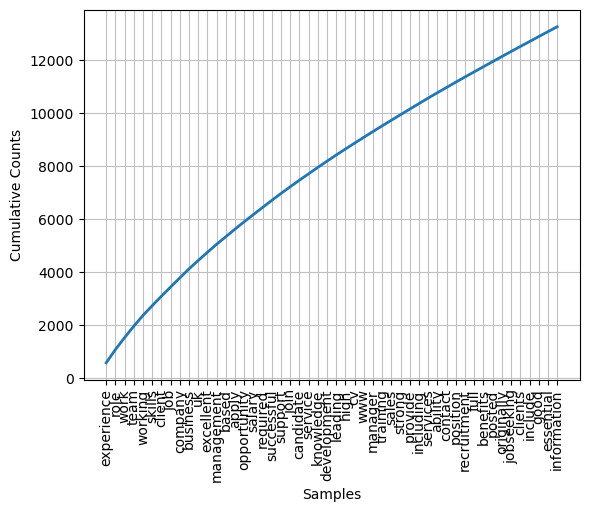

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [26]:
#visualising top 50 words
doc_fd.plot(50, cumulative=True)

In [27]:
common_50=[word[0] for word in doc_fd.most_common(50)]

In [28]:
# removing most common 50 words from the tokenised job ads
def MostRepeatedWordsRemover(ads):
    return [word for word in ads if word not in common_50]

tk_job_ads = [MostRepeatedWordsRemover(ads) for ads in tk_job_ads]

In [29]:
file_stats(tk_job_ads)

Vocabulary size:  5168
Total number of tokens:  81205
Lexical diversity:  0.06364140139153993
Total number of reviews: 776
Average review length: 104.64561855670104
Maximum review length: 401
Minimum review length: 7
Standard deviation of review length: 58.44628718710534


In [30]:
#creating a sorted vocabulary of words
vocab_words = sorted(set(chain.from_iterable([set(ads) for ads in tk_job_ads])))

#### Saving the tokenised Job Ads

In [31]:
def save_job_ads(reviewFilename,tk_ads):
    out_file = open(reviewFilename, 'w') # creates a txt file and open to save the reviews
    string = "\n".join([" ".join(review) for review in tk_ads])
    out_file.write(string)
    out_file.close() # close the file

In [32]:
save_job_ads("Tokenised_Ads.txt",tk_job_ads)

## Saving required outputs
Save the vocabulary, bigrams and job advertisment txt
- vocab.txt

In [33]:
# code to save output data...
out_file = open("vocab.txt", 'w') # creates a txt file named vocab.txt

for ind in range(0, len(vocab_words)):
    out_file.write("{},{}\n".format(ind,vocab_words[ind])) # writing the file in requried format.
out_file.close() # close the file